# Introduction

- Use case: derive descriptive statistical measures, generate plots, and build a predictive model to determine the likelihood of a passenger surviving the Titanic disaster.
- Data source: https://www.kaggle.com/competitions/titanic/data


# Exploratory Data Analysis (EDA)

In [1]:
# Import packages

import numpy as np      # linear algebra and arrays
import pandas as pd     # data wrangling

%matplotlib inline
import matplotlib.pyplot as plt     # data visualization
import seaborn as sns               # data visualization

from scipy.stats import mode    # to create additional features
import string   # to create additional features


In [2]:
# Enabling autocompletion in the Jupyther notebook
%config IPCompleter.greedy=True

## Load data

In [3]:
from pathlib import Path
cwd        = Path.cwd()
dataFolder = Path(cwd.parent , 'data')

In [4]:
# train
df_train = pd.read_csv(Path(dataFolder, 'train.csv'))
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# test
df_test = pd.read_csv(Path(dataFolder, 'test.csv'))
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
# gender
df_gender = pd.read_csv(Path(dataFolder, 'gender_submission.csv'))

# This dataset is not necessary for the analysis.

In [7]:
# create full dataset by appending the train and test
# NOTE: the append function will be deprecated and will be removed. In the future, use 'pandas.concat' !!!!
df_full = df_train.append(df_test, ignore_index= True)

/var/folders/wg/rd3t43dn13x2q5vt0sz8g1cc0000gn/T/ipykernel_12248/3295624958.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_full = df_train.append(df_test, ignore_index= True)


In [8]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In total, the combined dataset includes 1309 passengers and it is close to the official passengers' number. Exact numbers of those traveling on the Titanic is not known, but the official total of all passengers and crew is 2,229. The approximate number of passengers seems to be 1316 (see here for a list of sources: https://en.wikipedia.org/wiki/Titanic#).

The passengers' list features 1309 tickets, but not all ticket owners boarded the ship--here, for example, embarked people are 1307 .

The appended `'test'` dataset does not contain information about the survived passengers. Hence, this information is missing also in the full dataset.

In [9]:
df_full.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Dataset features

The dataset provides information about passengers who were aboard the Titanic, including details about their demographics, ticket information, cabin location, and survival status. Here's an explanation of the columns in the Titanic dataset:

- PassengerId: A unique identifier for each passenger.
- Survived: Indicates whether the passenger survived (1) or did not survive (0).
- Pclass: The passenger's class of travel:
    - 1 = 1st class.
    - 2 = 2nd class.
    - 3 = 3rd class.
- Name: The name of the passenger.
- Sex: The gender of the passenger.
- Age: The age of the passenger. This column may have missing values.
- SibSp: The number of siblings or spouses traveling with the passenger.
- Parch: The number of parents or children traveling with the passenger.
- Ticket: The ticket number.
- Fare: The fare paid by the passenger.
- Cabin: The cabin number where the passenger stayed. This column may have missing values.
- Embarked: The port at which the passenger boarded the ship:
    - C = Cherbourg, a port in France.
    - Q = Queenstown, a port in Ireland.
    - S = Southampton, a port in England.

## Understanding the data

In [10]:
# Inspect the training dataset

df_train.info()

# checking NAs for train dataframe
df_train.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
df_train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891.0,NaN,NaN,NaN,446.0,257.353842,1.0,223.5,446.0,668.5,891.0
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Name,891,891,"Braund, Mr. Owen Harris",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
SibSp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


In [12]:
# Inspect the test dataset

df_test.info()

# checking NAs for test dataframe
df_test.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [13]:
df_test.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,418.0,NaN,NaN,NaN,1100.5,120.810458,892.0,996.25,1100.5,1204.75,1309.0
Pclass,418.0,NaN,NaN,NaN,2.26555,0.841838,1.0,1.0,3.0,3.0,3.0
Name,418,418,"Kelly, Mr. James",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,418,2,male,266,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,332.0,NaN,NaN,NaN,30.27259,14.181209,0.17,21.0,27.0,39.0,76.0
SibSp,418.0,NaN,NaN,NaN,0.447368,0.89676,0.0,0.0,0.0,1.0,8.0
Parch,418.0,NaN,NaN,NaN,0.392344,0.981429,0.0,0.0,0.0,0.0,9.0
Ticket,418,363,PC 17608,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,417.0,NaN,NaN,NaN,35.627188,55.907576,0.0,7.8958,14.4542,31.5,512.3292
Cabin,91,76,B57 B59 B63 B66,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# TODO: cleaning data from NAs

In [15]:
# save the datasets as dataframes and list them
# This is a useful step to then use the list for loops or functions

df_test = pd.DataFrame(df_test)
df_train = pd.DataFrame(df_train)

df_list = [df_test, df_train ]

## Imputing NAs
- The core variable with missing data is `'Age`'.
    - I will impute the missing values by making assumptions on the median age per class.

- It is not possible to impute the missing values for the variable `'Cabin`' as this variable applies only to 1st and 2nd class passengers and it is not avaialable for 3rd class passengers.

In [16]:
def preprocess_and_visualize_titles(data):
    # Splitting the Name column and extracting titles
    title = [i.split(',')[1].split('.')[0].strip() for i in data['Name']]
    data['title'] = pd.Series(title)

    # Calculate value counts
    value_counts = data['title'].value_counts()

    # Create subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # Subplot 1: Text Display of Value Counts as a Table
    cell_text = [[title, count] for title, count in value_counts.items()]
    ax1.table(cellText=cell_text, colLabels=['Title', 'Count'], cellLoc='center', loc='center')
    ax1.axis('off')  # Turn off axes for text output
    ax1.set_title('Value Counts')

    # Subplot 2: Count Plot as Bar Plot
    sns.countplot(data=data, x='title', ax=ax2)
    ax2.set_title('Count Plot')
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha='right')

    plt.show()

    # creating variable for social status that takes vale 'high status' for the following titles in parenthesis ('Lady', 'the Countess', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona', 'Master') and 'low status' for the other titles
    data['social_status'] = np.where(data['title'].isin(['Lady', 'the Countess', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona', 'Master']), 'high status', 'low status')

    # Replacing titles according to specified rules
    data["title"] = data["title"].replace(['Lady', 'the Countess', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    data['title'] = data['title'].replace(['Miss', 'Ms', 'Mme', 'Mlle', 'Mrs'], 'Miss/Ms/Mme/Mlle/Mrs')

    # Plot distribution of title feature after replacement
    sns.set_theme(style="darkgrid")
    custom_palette = ["#F08080", "#90EE90", "#ADD8E6", "#F8B1D0"]
    data['title'].value_counts().plot(kind='bar', color=custom_palette, width=0.3)
    plt.title('Distribution of title Feature')
    plt.xticks(rotation=0)
    plt.xlabel('')
    plt.ylabel('count')
    plt.show()

    return data


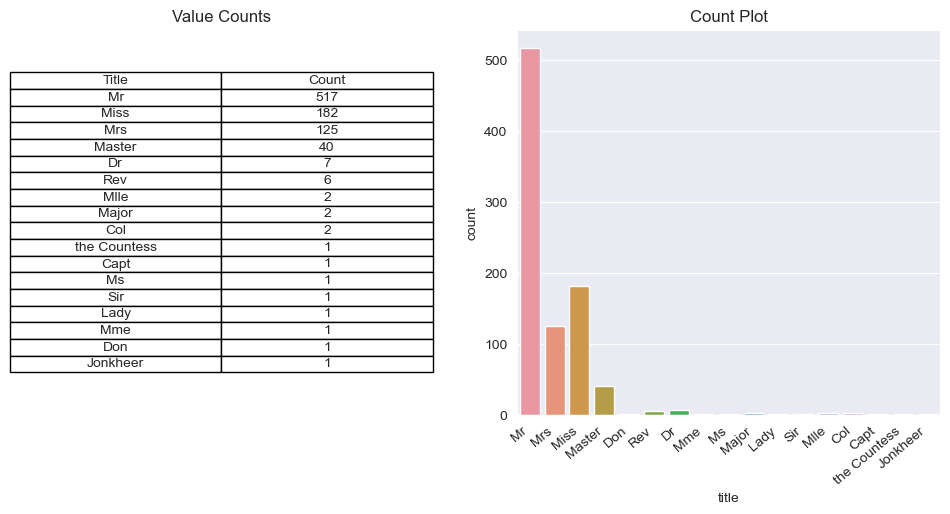

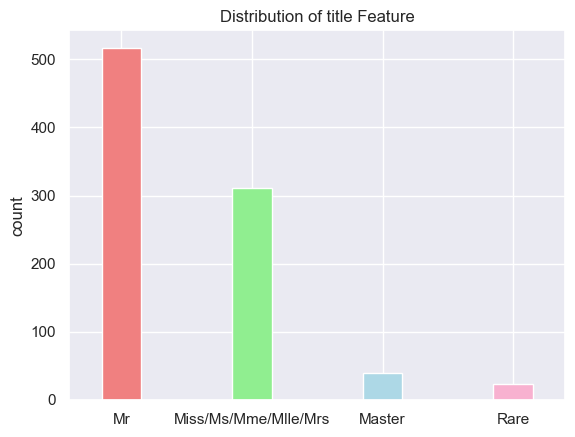

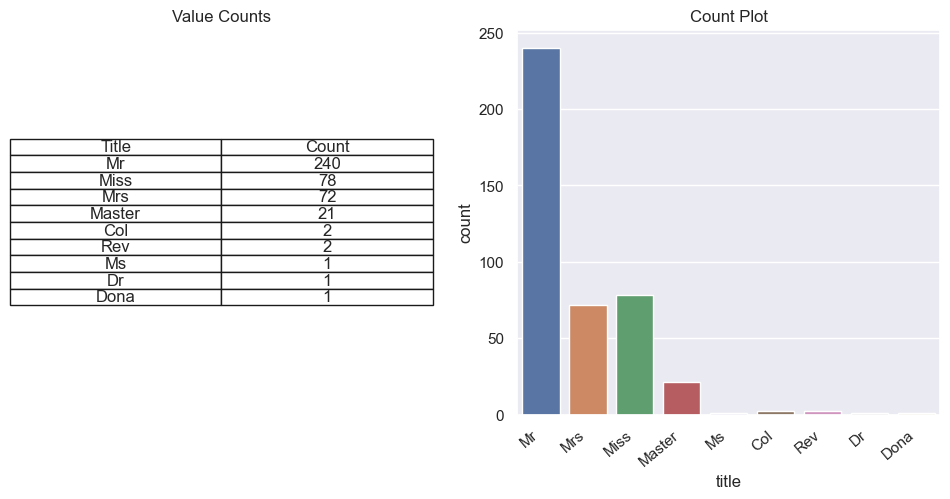

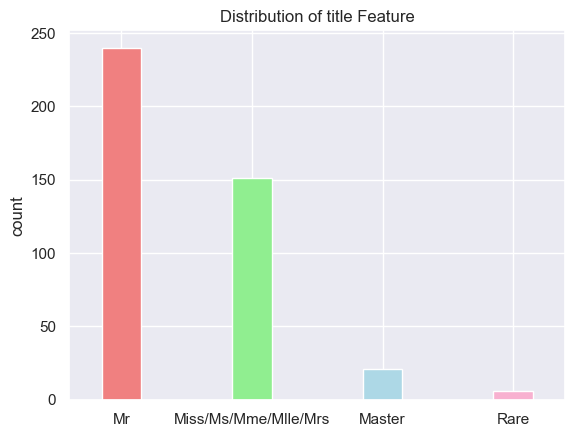

In [17]:
# aplying function to the other two datasets

df_train = preprocess_and_visualize_titles(df_train)
df_test = preprocess_and_visualize_titles(df_test)



In [18]:
# filling age column according to the passenger data with title based median:
for df in df_list:
    df.loc[(df['title'] == 'Mr') & (df['Age'].isnull()), 'Age'] = df[df['title'] == 'Mr']['Age'].median()
    df.loc[(df['title'] == 'Miss/Ms/Mme/Mlle/Mrs') & (df['Age'].isnull()), 'Age'] = df[df['title'] == 'Mr']['Age'].median()
    df.loc[(df['title'] == 'Master') & (df['Age'].isnull()), 'Age'] = df[df['title'] == 'Mr']['Age'].median()
    df.loc[(df['title'] == 'Rare') & (df['Age'].isnull()), 'Age'] = df[df['title'] == 'Mr']['Age'].median()


In [19]:
# verifying the NAs
df_train.isnull().sum()

PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age                0
SibSp              0
Parch              0
Ticket             0
Fare               0
Cabin            687
Embarked           2
title              0
social_status      0
dtype: int64

In [20]:
df_test.isnull().sum()

PassengerId        0
Pclass             0
Name               0
Sex                0
Age                0
SibSp              0
Parch              0
Ticket             0
Fare               1
Cabin            327
Embarked           0
title              0
social_status      0
dtype: int64

In [21]:
# drop missing value for the variable 'Fare' in the test dataset
df_test.dropna(subset=['Fare'], inplace=True)

## Adding features to the datasets
### Family size and age per class

In [22]:
# Adding features: family size and age per class

# Ideas to create these additional features come from the link (https://triangleinequality.wordpress.com/2013/09/08/basic-feature-engineering-with-the-titanic-data/)
def add_features(df_train, df_test):
    features = {
        'Family_Size': ('SibSp', 'Parch', lambda df: df['SibSp'] + df['Parch']),
        # to create Age_Class, I will group by Pclass and then calculate the median age per class
        'Age_Class': ('Age', 'Pclass', lambda df: df.groupby('Pclass')['Age'].transform('median'))
    }

    for df in [df_train, df_test]:
        for feature, (col1, col2, func) in features.items():
            df[feature] = func(df)

    return df_train, df_test


# The code above makes the calculation into a single loop and utilizes a dictionary to store the column calculations.

df_train, df_test = add_features(df_train, df_test)


### Encoding Gender, Social Class, Port and Travel Class

In [23]:
 # copy of the variables Sex, social_status, Embarked and Pclass in both the two datasets df_test and df_training. This is a pre-step to then proceed with the variables encoding.
# Define a list of column names and their corresponding data types
columns_and_types = [
    ('Gender', 'Sex', 'str'),
    ('Social_Status', 'social_status', 'str'),
    ('Port', 'Embarked', 'str'),
    ('Class', 'Pclass', 'int')
]

# Loop through the list and apply data type conversion to df_train and df_test
for new_col, old_col, data_type in columns_and_types:
    df_train[new_col] = df_train[old_col].astype(data_type)
    df_test[new_col] = df_test[old_col].astype(data_type)


In [24]:
# Code to encode the variables 'Embarked',  and 'PcClass' in the dataset df_train_encoded. Note that using the get_dummies function, the two orignal variables 'Embarked'  and 'PcClass' are dropped from the dataset df_train_encoded.Hence, I won't use this function.

df_train_encoded = df_train.copy()
df_train_encoded = pd.get_dummies(df_train, columns=['Embarked', 'Pclass'], prefix=['Embarked', 'Class'], drop_first=True)

df_train_encoded.head()


,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Family_Size,Age_Class,Gender,Social_Status,Port,Class,Embarked_Q,Embarked_S,Class_2,Class_3
0,1,0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,...,1,30.0,male,low status,S,3,0,1,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,...,1,35.0,female,low status,C,1,0,0,0,0
2,3,1,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,...,0,30.0,female,low status,S,3,0,1,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,...,1,35.0,female,low status,S,1,0,1,0,0
4,5,0,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,...,0,30.0,male,low status,S,3,0,1,0,1


In [25]:
# encoding the variables 'Gender', 'Social_Status', 'Port'  and 'Class' in the two datasets df_train and df_test. The datasets retain the two original variables 'Embarked'  and 'Pclass'.


df_train = pd.get_dummies(df_train, columns=['Gender', 'Social_Status','Port', 'Class'], prefix=['Gender', 'Status','Port', 'Class'], drop_first=False)
df_test = pd.get_dummies(df_test, columns=['Gender', 'Social_Status','Port', 'Class'], prefix=['Gender', 'Status','Port', 'Class'], drop_first=False)

df_train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Gender_male,Status_high status,Status_low status,Port_C,Port_Q,Port_S,Port_nan,Class_1,Class_2,Class_3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,1,0,1,0,0,1,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,0,1,1,0,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0,1,0,0,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,0,1,0,0,1,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,1,0,1,0,0,1,0,0,0,1


## Creating summary tables
- Summary stats
- Correlation table

### Training dataset

In [26]:
df_train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891.0,NaN,NaN,NaN,446.0,257.353842,1.0,223.5,446.0,668.5,891.0
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Name,891,891,"Braund, Mr. Owen Harris",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,891.0,NaN,NaN,NaN,29.758889,13.00257,0.42,22.0,30.0,35.0,80.0
SibSp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


 Some variables like `'Name'`, `'Ticket'`, `'Cabin'` are sting variables not meaningful for the analysis and can be dropped in the summary stats.

I will create a subset of the original test dataset to produce the summary statistics and the correlation table. I will also re-name some variables to ease the tables' reading.

In [27]:
# subset of train dataset
# Print list of variables
print(df_train.columns.tolist())

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'title', 'social_status', 'Family_Size', 'Age_Class', 'Gender_female', 'Gender_male', 'Status_high status', 'Status_low status', 'Port_C', 'Port_Q', 'Port_S', 'Port_nan', 'Class_1', 'Class_2', 'Class_3']


In [28]:
# dataset for stats for the training sample

df_train_stats = df_train[['PassengerId', 'Survived', 'Age', 'Fare', 'Family_Size', 'Age_Class', 'Gender_female', 'Gender_male', 'Status_high status', 'Port_C', 'Port_Q', 'Port_S', 'Class_1', 'Class_2', 'Class_3']]

In [29]:
# renaming variables for the summary stats table
df_train_stats.rename(columns={
    'Gender_female': 'Female',
    'Gender_male': 'Male',
    'Status_high status': 'High status',
    'Port_C': 'Cherbourg',
    'Port_Q': 'Queenstown',
    'Port_S': 'Southampton',
}, inplace=True)



/var/folders/wg/rd3t43dn13x2q5vt0sz8g1cc0000gn/T/ipykernel_12248/71920745.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_stats.rename(columns={


In [30]:
df_train_stats.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Age,891.0,29.758889,13.002570,0.42,22.0000,30.0000,35.0,80.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292
Family_Size,891.0,0.904602,1.613459,0.00,0.0000,0.0000,1.0,10.0000
Age_Class,891.0,31.212121,2.143951,30.00,30.0000,30.0000,30.0,35.0000
Female,891.0,0.352413,0.477990,0.00,0.0000,0.0000,1.0,1.0000
Male,891.0,0.647587,0.477990,0.00,0.0000,1.0000,1.0,1.0000
High status,891.0,0.070707,0.256479,0.00,0.0000,0.0000,0.0,1.0000
Cherbourg,891.0,0.188552,0.391372,0.00,0.0000,0.0000,0.0,1.0000


In [31]:
# simpified table used for explanatory purposes

np.round(df_train_stats.describe(), 2).T[['count','mean', 'std', 'min', 'max']]

,count,mean,std,min,max
PassengerId,891.0,446.00,257.35,1.00,891.00
Survived,891.0,0.38,0.49,0.00,1.00
Age,891.0,29.76,13.00,0.42,80.00
Fare,891.0,32.20,49.69,0.00,512.33
Family_Size,891.0,0.90,1.61,0.00,10.00
Age_Class,891.0,31.21,2.14,30.00,35.00
Female,891.0,0.35,0.48,0.00,1.00
Male,891.0,0.65,0.48,0.00,1.00
High status,891.0,0.07,0.26,0.00,1.00
Cherbourg,891.0,0.19,0.39,0.00,1.00


#### Exporting table in Latex format

In [32]:
# Creating the 'output' directory within the path of the project folder. In this folder, I will save the tables and graphs produced in this notebook.

Path(cwd.parent, 'output').mkdir(parents=True, exist_ok=True)

In [33]:
# Exporting simplified table in cell above in Latex format and save it in the output folder within the project folder

np.round(df_train_stats.describe(), 2).T[['count','mean', 'std', 'min', 'max']].to_latex(Path(cwd.parent, 'output', 'summary_stats_train_simplified.tex'))

#df_train_stats.describe(include='all').T.to_latex(Path(cwd.parent, 'output', 'summary_stats_train.tex'))

/var/folders/wg/rd3t43dn13x2q5vt0sz8g1cc0000gn/T/ipykernel_12248/3579513423.py:3: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  np.round(df_train_stats.describe(), 2).T[['count','mean', 'std', 'min', 'max']].to_latex(Path(cwd.parent, 'output', 'summary_stats_train_simplified.tex'))


### Test dataset

In [34]:
df_test.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,417.0,NaN,NaN,NaN,1100.635492,120.923774,892.0,996.0,1101.0,1205.0,1309.0
Pclass,417.0,NaN,NaN,NaN,2.263789,0.842077,1.0,1.0,3.0,3.0,3.0
Name,417,417,"Kelly, Mr. James",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,417,2,male,265,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,417.0,NaN,NaN,NaN,29.834532,12.580779,0.17,23.0,28.5,35.0,76.0
SibSp,417.0,NaN,NaN,NaN,0.448441,0.897568,0.0,0.0,0.0,1.0,8.0
Parch,417.0,NaN,NaN,NaN,0.393285,0.982419,0.0,0.0,0.0,0.0,9.0
Ticket,417,362,PC 17608,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,417.0,NaN,NaN,NaN,35.627188,55.907576,0.0,7.8958,14.4542,31.5,512.3292
Cabin,91,76,B57 B59 B63 B66,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
# subset of test dataset
# Print list of variables
print(df_test.columns.tolist())


['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'title', 'social_status', 'Family_Size', 'Age_Class', 'Gender_female', 'Gender_male', 'Status_high status', 'Status_low status', 'Port_C', 'Port_Q', 'Port_S', 'Class_1', 'Class_2', 'Class_3']


In [36]:
# dataset for stats for the test sample (subset of the original test dataset)
df_test_stats = df_test[['PassengerId', 'Age', 'Ticket', 'Fare', 'Family_Size', 'Age_Class', 'Gender_female', 'Gender_male', 'Status_high status', 'Port_C', 'Port_Q', 'Port_S', 'Class_1', 'Class_2', 'Class_3']]

In [37]:
# renaming variables for the summary stats table
df_test_stats.rename(columns={
    'Gender_female': 'Female',
    'Gender_male': 'Male',
    'Status_high status': 'High status',
    'Port_C': 'Cherbourg',
    'Port_Q': 'Queenstown',
    'Port_S': 'Southampton',
}, inplace=True)

/var/folders/wg/rd3t43dn13x2q5vt0sz8g1cc0000gn/T/ipykernel_12248/3011093098.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_stats.rename(columns={


In [38]:
# simpified table used for explanatory purposes

np.round(df_test_stats.describe(), 2).T[['count','mean', 'std', 'min', 'max']]

,count,mean,std,min,max
PassengerId,417.0,1100.64,120.92,892.00,1309.00
Age,417.0,29.83,12.58,0.17,76.00
Fare,417.0,35.63,55.91,0.00,512.33
Family_Size,417.0,0.84,1.52,0.00,10.00
Age_Class,417.0,31.08,4.66,28.00,39.00
Female,417.0,0.36,0.48,0.00,1.00
Male,417.0,0.64,0.48,0.00,1.00
High status,417.0,0.06,0.25,0.00,1.00
Cherbourg,417.0,0.24,0.43,0.00,1.00
Queenstown,417.0,0.11,0.31,0.00,1.00


#### Exporting table in Latex format

In [39]:
# Exporting simplified table in cell above in Latex format and save it in the output folder within the project folder

np.round(df_test_stats.describe(), 2).T[['count','mean', 'std', 'min', 'max']].to_latex(Path(cwd.parent, 'output', 'summary_stats_test_simplified.tex'))

#df_test.describe(include='all').T.to_latex(Path(cwd.parent, 'output', 'summary_stats_test.tex'))

/var/folders/wg/rd3t43dn13x2q5vt0sz8g1cc0000gn/T/ipykernel_12248/3483545575.py:3: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  np.round(df_test_stats.describe(), 2).T[['count','mean', 'std', 'min', 'max']].to_latex(Path(cwd.parent, 'output', 'summary_stats_test_simplified.tex'))


## Correlation table
### Training dataset

In [40]:
# Correlation table for the training dataset. I want to add the statistical significance of the correlation coefficients. I will use the function 'corr' from the package 'scipy.stats' and the function 'corrcoef' from the package 'numpy'.
# I will also use the function 'heatmap' from the package 'seaborn' to produce a heatmap of the correlation table.

# Import packages

from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import kendalltau



In [41]:
# Correlation table for the training dataset that includes the statistical significance of the correlation coefficients

df_train_stats.corr(method='pearson')

,PassengerId,Survived,Age,Fare,Family_Size,Age_Class,Female,Male,High status,Cherbourg,Queenstown,Southampton,Class_1,Class_2,Class_3
PassengerId,1.000000,-0.005007,0.033019,0.012658,-0.040143,0.034303,-0.042939,0.042939,0.018436,-0.001205,-0.033606,0.022148,0.034303,-0.000086,-0.029486
Survived,-0.005007,1.000000,-0.070657,0.257307,0.016639,0.285904,0.543351,-0.543351,0.061385,0.168240,0.003650,-0.155660,0.285904,0.093349,-0.322308
Age,0.033019,-0.070657,1.000000,0.090632,-0.248954,0.319120,-0.084660,0.084660,-0.188050,0.032330,-0.010738,-0.029322,0.319120,0.004949,-0.278983
Fare,0.012658,0.257307,0.090632,1.000000,0.217138,0.591711,0.182333,-0.182333,0.018880,0.269335,-0.117216,-0.166603,0.591711,-0.118557,-0.413333
Family_Size,-0.040143,0.016639,-0.248954,0.217138,1.000000,-0.046114,0.200988,-0.200988,0.271547,-0.046215,-0.058592,0.079977,-0.046114,-0.038594,0.071142
Age_Class,0.034303,0.285904,0.319120,0.591711,-0.046114,1.000000,0.098013,-0.098013,0.027864,0.296423,-0.155342,-0.170379,1.000000,-0.288585,-0.626738
Female,-0.042939,0.543351,-0.084660,0.182333,0.200988,0.098013,1.000000,-1.000000,-0.175989,0.082853,0.074115,-0.125722,0.098013,0.064746,-0.137143
Male,0.042939,-0.543351,0.084660,-0.182333,-0.200988,-0.098013,-1.000000,1.000000,0.175989,-0.082853,-0.074115,0.125722,-0.098013,-0.064746,0.137143
High status,0.018436,0.061385,-0.188050,0.018880,0.271547,0.027864,-0.175989,0.175989,1.000000,-0.009837,0.008657,0.004545,0.027864,0.043155,-0.059130
Cherbourg,-0.001205,0.168240,0.032330,0.269335,-0.046215,0.296423,0.082853,-0.082853,-0.009837,1.000000,-0.148258,-0.778359,0.296423,-0.125416,-0.153329


In [42]:
# Correlation table for the training dataset that includes the statistical significance of the correlation coefficients and uses the function 'corrcoef' from the package 'numpy'

np.corrcoef(df_train_stats, rowvar=False)

array([[ 1.00000000e+00, -5.00666077e-03,  3.30188317e-02,
         1.26582193e-02, -4.01429309e-02,  3.43032637e-02,
        -4.29388801e-02,  4.29388801e-02,  1.84355546e-02,
        -1.20479501e-03, -3.36056952e-02,  2.21477753e-02,
         3.43032637e-02, -8.62351973e-05, -2.94856675e-02],
       [-5.00666077e-03,  1.00000000e+00, -7.06572313e-02,
         2.57306522e-01,  1.66389893e-02,  2.85903768e-01,
         5.43351381e-01, -5.43351381e-01,  6.13849087e-02,
         1.68240431e-01,  3.65038268e-03, -1.55660273e-01,
         2.85903768e-01,  9.33485724e-02, -3.22308357e-01],
       [ 3.30188317e-02, -7.06572313e-02,  1.00000000e+00,
         9.06318724e-02, -2.48954175e-01,  3.19119948e-01,
        -8.46599155e-02,  8.46599155e-02, -1.88049573e-01,
         3.23303967e-02, -1.07376915e-02, -2.93220143e-02,
         3.19119948e-01,  4.94857325e-03, -2.78982651e-01],
       [ 1.26582193e-02,  2.57306522e-01,  9.06318724e-02,
         1.00000000e+00,  2.17138407e-01,  5.91710719

<Axes: >

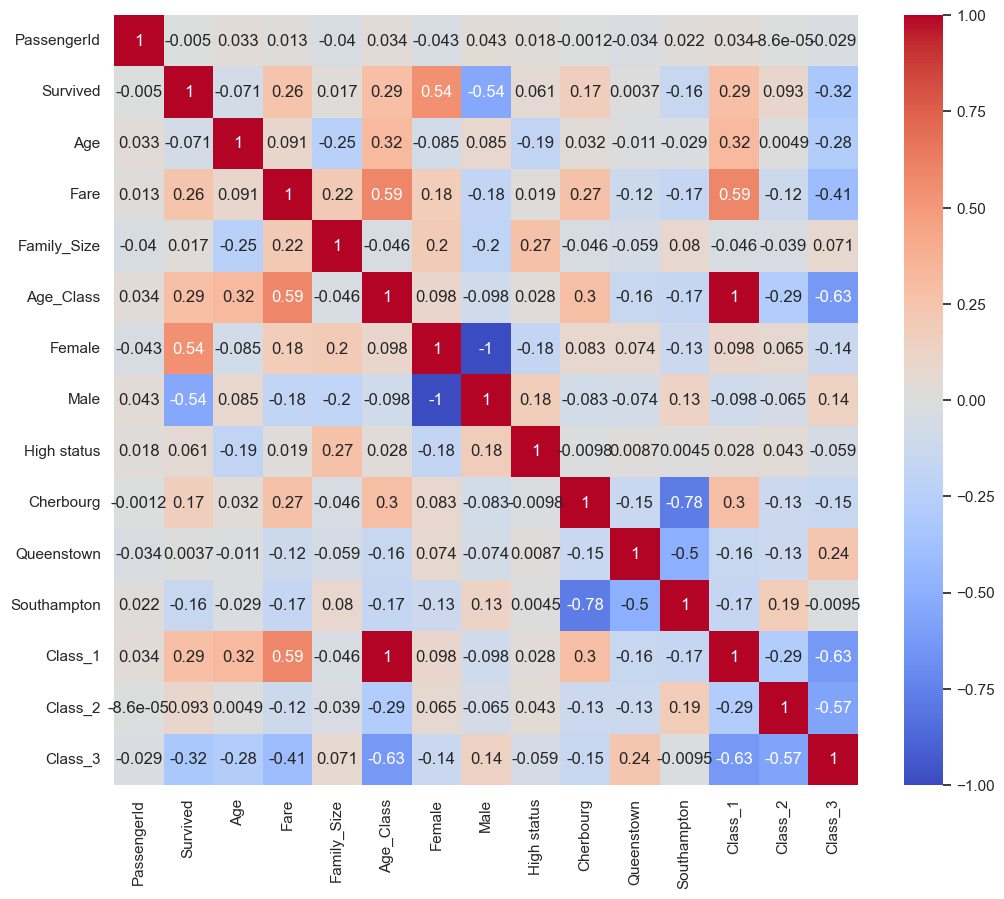

In [43]:
# Correlation graph for the training dataset (heatmap). Scale the plot to the full width of the window.

plt.figure(figsize=(12, 10))

sns.heatmap(df_train_stats.corr(), annot=True, cmap='coolwarm')

**Notes about the correlation table**:
- The correlation table shows that the variables `'Age'`  and, by construct, `'Age_Class'` are negatively correlated with the variable `'Class_1'` and `'Fare'`. This means that the older the passenger, the more likely he/she is to travel in 3rd class and to pay a lower fare.
- It is more likely to be a survivor for passengers that are female -- but it is a mechanical issue becuase the passengers are mostly male and the correlation is not very strong.
- For those with travelling with a large family the probability of survival is lower.
- Passengers with higher status tend to travel in 1st class and to pay a higher fare. They are likely to travel with family -- the correlation is not very strong and this is because often noble titles used for `'high_status'` associate with female passengers.

#### Exporting table in Latex format

In [44]:
# Exporting table in Latex format and save it in the output folder within the project folder
df_train_stats.corr(method='pearson').to_latex(Path(cwd.parent, 'output', 'correlation_table_train.tex'))

/var/folders/wg/rd3t43dn13x2q5vt0sz8g1cc0000gn/T/ipykernel_12248/2132768020.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df_train_stats.corr(method='pearson').to_latex(Path(cwd.parent, 'output', 'correlation_table_train.tex'))


### Save the heatmap as a figure

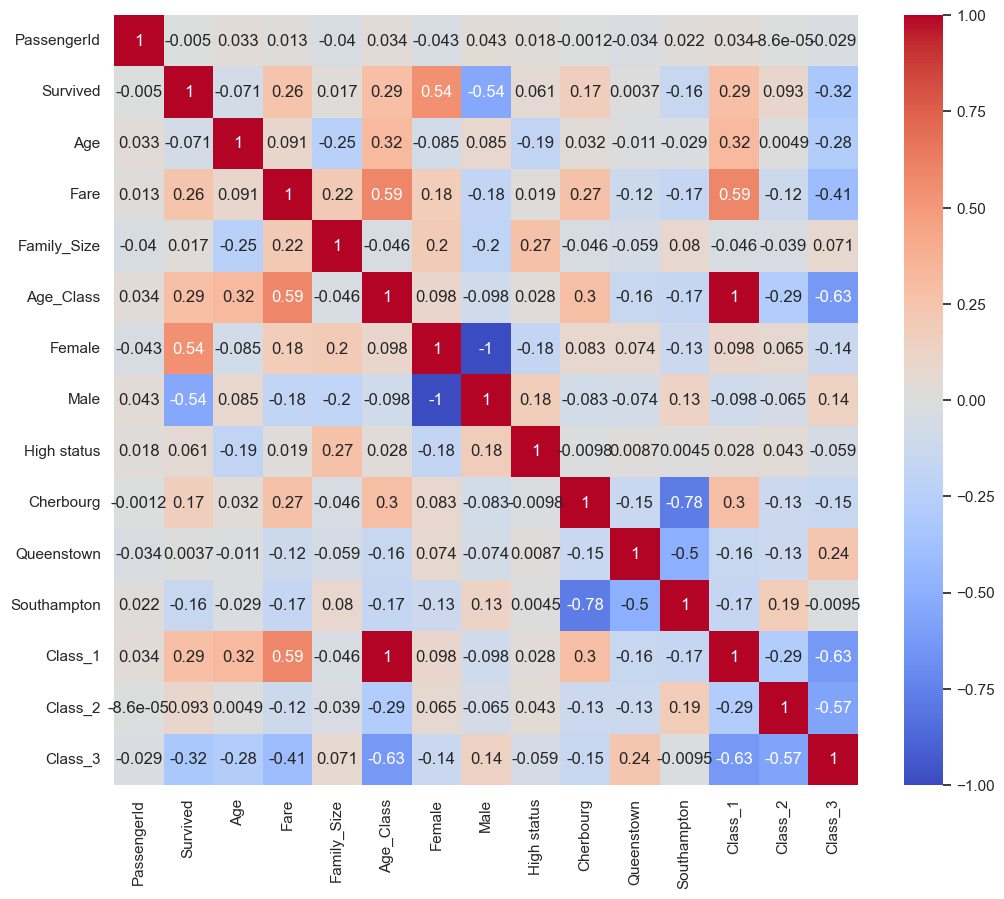

In [45]:
# save the heatmap for the correlation as a figure in the outcome folder within the project folder
plt.figure(figsize=(12, 10))

sns.heatmap(df_train_stats.corr(), annot=True, cmap='coolwarm')

plt.savefig(Path(cwd.parent, 'output', 'correlation_table_train.png'))

#### Correlation table

In [46]:
# Correlation table for the test dataset that includes the statistical significance of the correlation coefficients

df_test_stats.corr(method='pearson')

/var/folders/wg/rd3t43dn13x2q5vt0sz8g1cc0000gn/T/ipykernel_12248/1848149527.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_test_stats.corr(method='pearson')


,PassengerId,Age,Fare,Family_Size,Age_Class,Female,Male,High status,Cherbourg,Queenstown,Southampton,Class_1,Class_2,Class_3
PassengerId,1.000000,-0.028719,0.008211,0.029484,-0.014984,-0.024117,0.024117,0.046704,-0.028076,-0.036141,0.048884,-0.011729,0.076740,-0.053689
Age,-0.028719,1.000000,0.339328,-0.070337,0.464399,0.008819,-0.008819,-0.234693,0.166658,-0.026432,-0.132413,0.469384,-0.045704,-0.372269
Fare,0.008211,0.339328,1.000000,0.249924,0.613615,0.191514,-0.191514,0.057979,0.312161,-0.155562,-0.178582,0.617096,-0.128806,-0.432160
Family_Size,0.029484,-0.070337,0.249924,1.000000,0.008806,0.160969,-0.160969,0.284125,-0.014167,-0.144774,0.107514,0.006998,-0.042796,0.029541
Age_Class,-0.014984,0.464399,0.613615,0.008806,1.000000,0.125671,-0.125671,-0.018282,0.382332,-0.181365,-0.224726,0.999099,-0.354754,-0.577852
Female,-0.024117,0.008819,0.191514,0.160969,0.125671,1.000000,-1.000000,-0.179025,0.032689,0.115033,-0.104681,0.125463,-0.046673,-0.070795
Male,0.024117,-0.008819,-0.191514,-0.160969,-0.125671,-1.000000,1.000000,0.179025,-0.032689,-0.115033,0.104681,-0.125463,0.046673,0.070795
High status,0.046704,-0.234693,0.057979,0.284125,-0.018282,-0.179025,0.179025,1.000000,0.054312,-0.061542,-0.008498,-0.020707,-0.047326,0.057537
Cherbourg,-0.028076,0.166658,0.312161,-0.014167,0.382332,0.032689,-0.032689,0.054312,1.000000,-0.200372,-0.767167,0.380998,-0.157448,-0.201889
Queenstown,-0.036141,-0.026432,-0.155562,-0.144774,-0.181365,0.115033,-0.115033,-0.061542,-0.200372,1.000000,-0.474720,-0.189346,-0.115096,0.261435


/var/folders/wg/rd3t43dn13x2q5vt0sz8g1cc0000gn/T/ipykernel_12248/3283940160.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_test_stats.corr(), annot=True, cmap='coolwarm')


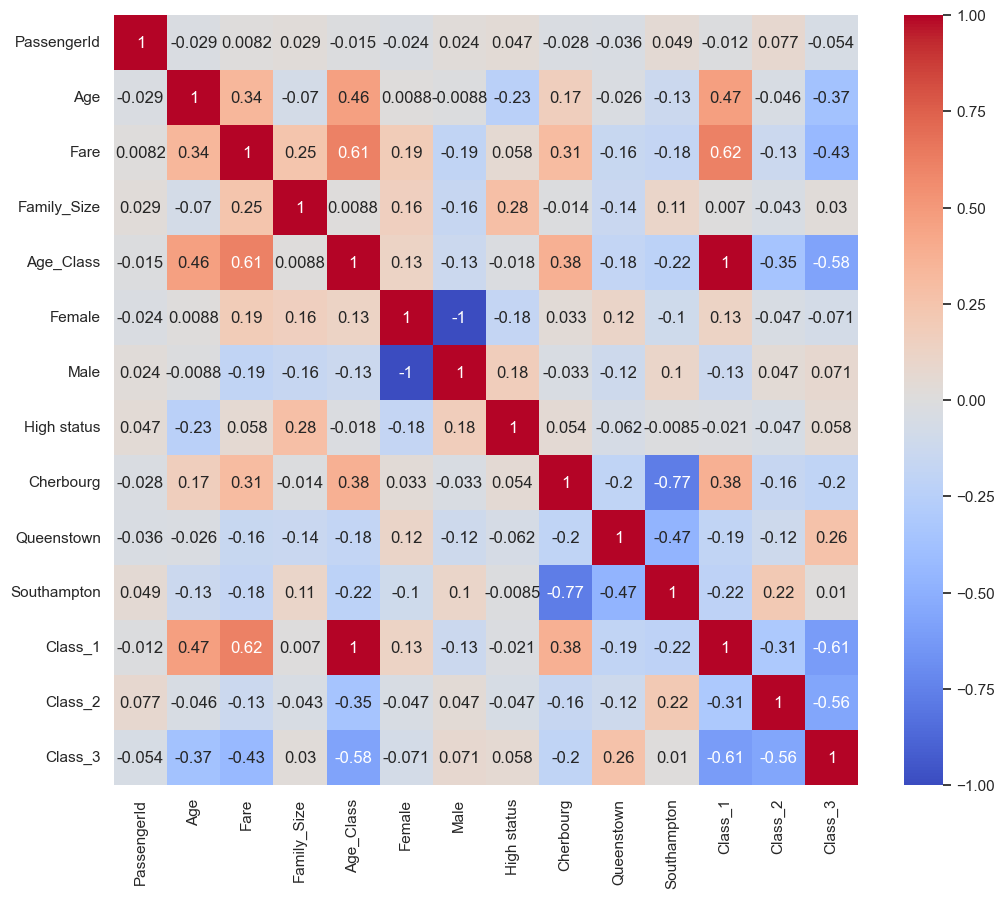

In [47]:
# Heatmap for the correlation table for the test dataset. Save it as a figure in the outcome folder within the project folder. Scale the plot to the full width of the window.

plt.figure(figsize=(12, 10))

sns.heatmap(df_test_stats.corr(), annot=True, cmap='coolwarm')

plt.savefig(Path(cwd.parent, 'output', 'correlation_table_test.png'))

#### Exporting table in Latex format

In [48]:
# Exporting table in Latex format and save it in the output folder within the project folder
df_test_stats.corr().to_latex(Path(cwd.parent, 'output', 'correlation_table_test.tex'))

/var/folders/wg/rd3t43dn13x2q5vt0sz8g1cc0000gn/T/ipykernel_12248/137995158.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_test_stats.corr().to_latex(Path(cwd.parent, 'output', 'correlation_table_test.tex'))
/var/folders/wg/rd3t43dn13x2q5vt0sz8g1cc0000gn/T/ipykernel_12248/137995158.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df_test_stats.corr().to_latex(Path(cwd.parent, 'output', 'correlation_table_test.tex'))


### Summary stats for survived and not survived passengers for the train dataset

In [49]:
# Summary stats for survived and not survived passengers in the training dataset

df_train_stats.groupby('Survived').describe(include='all').T

Survived                    0           1
PassengerId count  549.000000  342.000000
            mean   447.016393  444.368421
            std    260.640469  252.358840
            min      1.000000    2.000000
            25%    211.000000  250.750000
...                       ...         ...
Class_3     min      0.000000    0.000000
            25%      0.000000    0.000000
            50%      1.000000    0.000000
            75%      1.000000    1.000000
            max      1.000000    1.000000

[112 rows x 2 columns]

## Creating summary graphs
### Train dataset

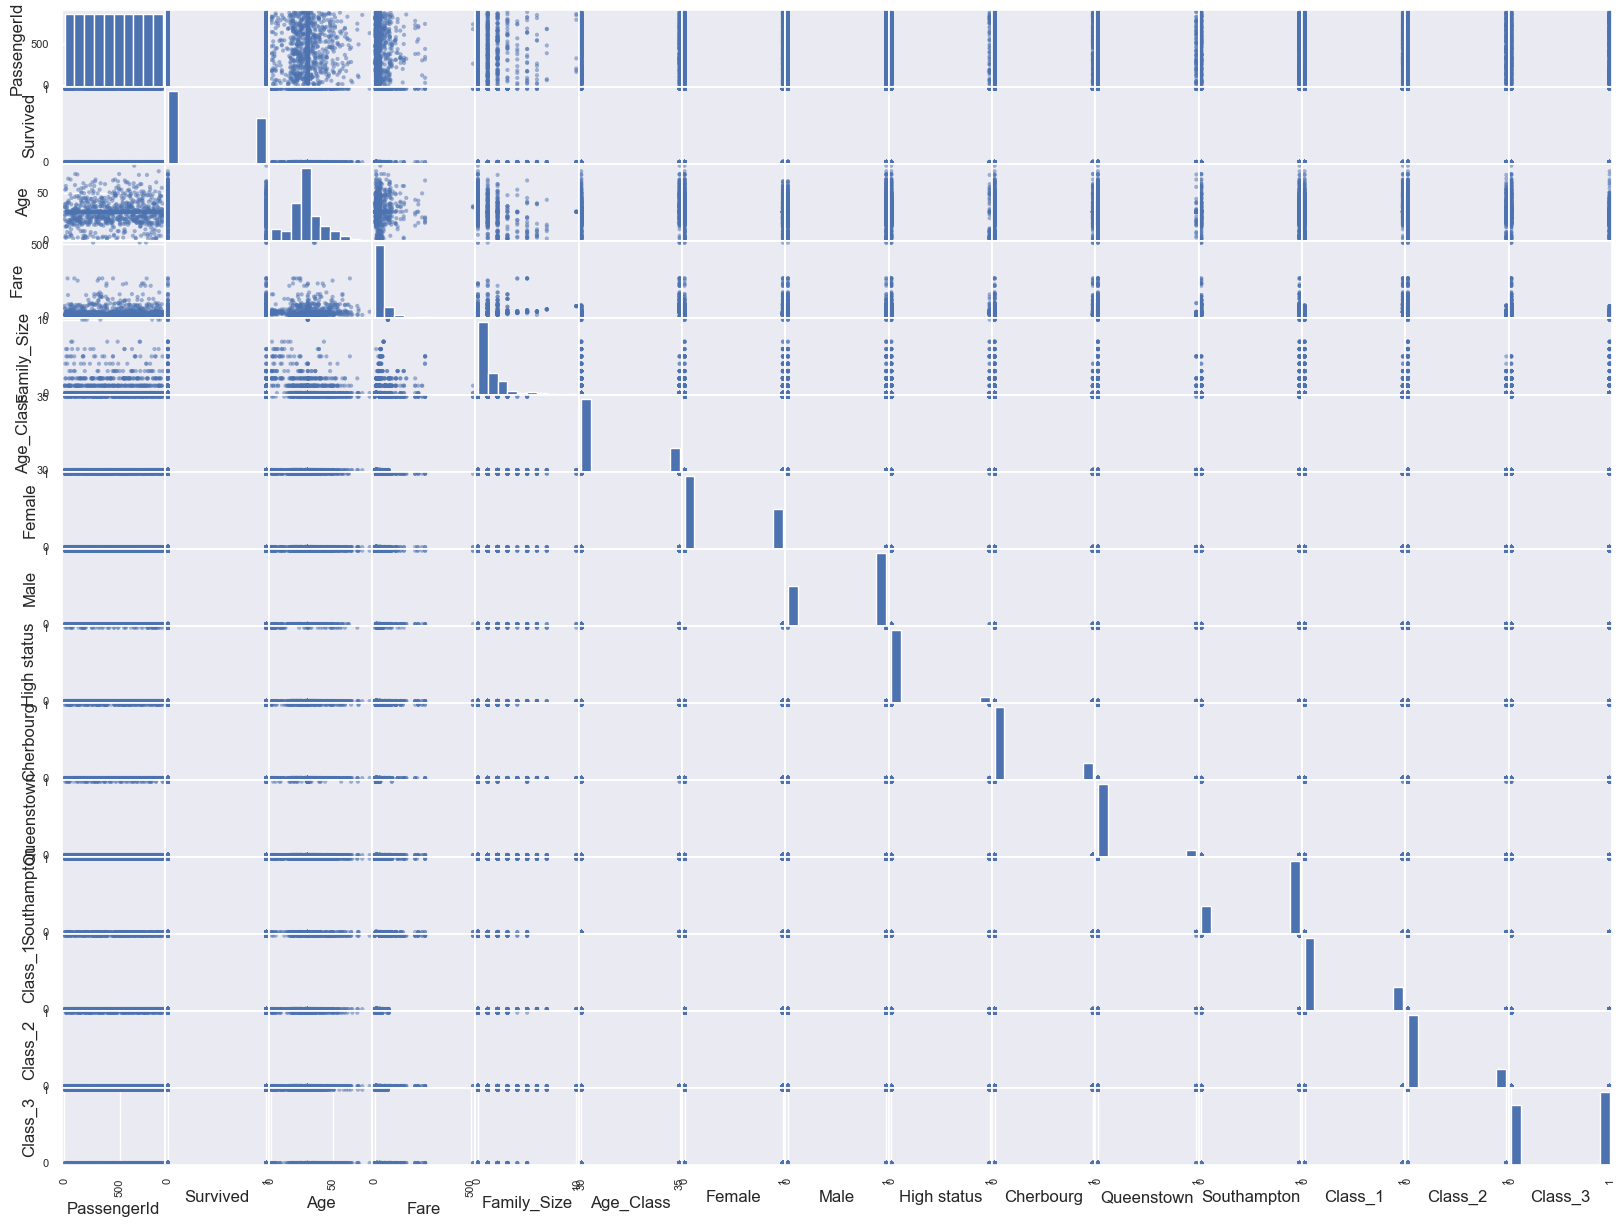

In [50]:
# Scatter matrix for the training dataset. Scale to the full width of the window.

pd.plotting.scatter_matrix(df_train_stats, figsize=(20, 15))

plt.show()

# Note: the scatter matrix is not very useful because it is difficult to read the variables' names. I will try other graphical representations

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Fare'}>],
       [<Axes: title={'center': 'Family_Size'}>, <Axes: >]], dtype=object)

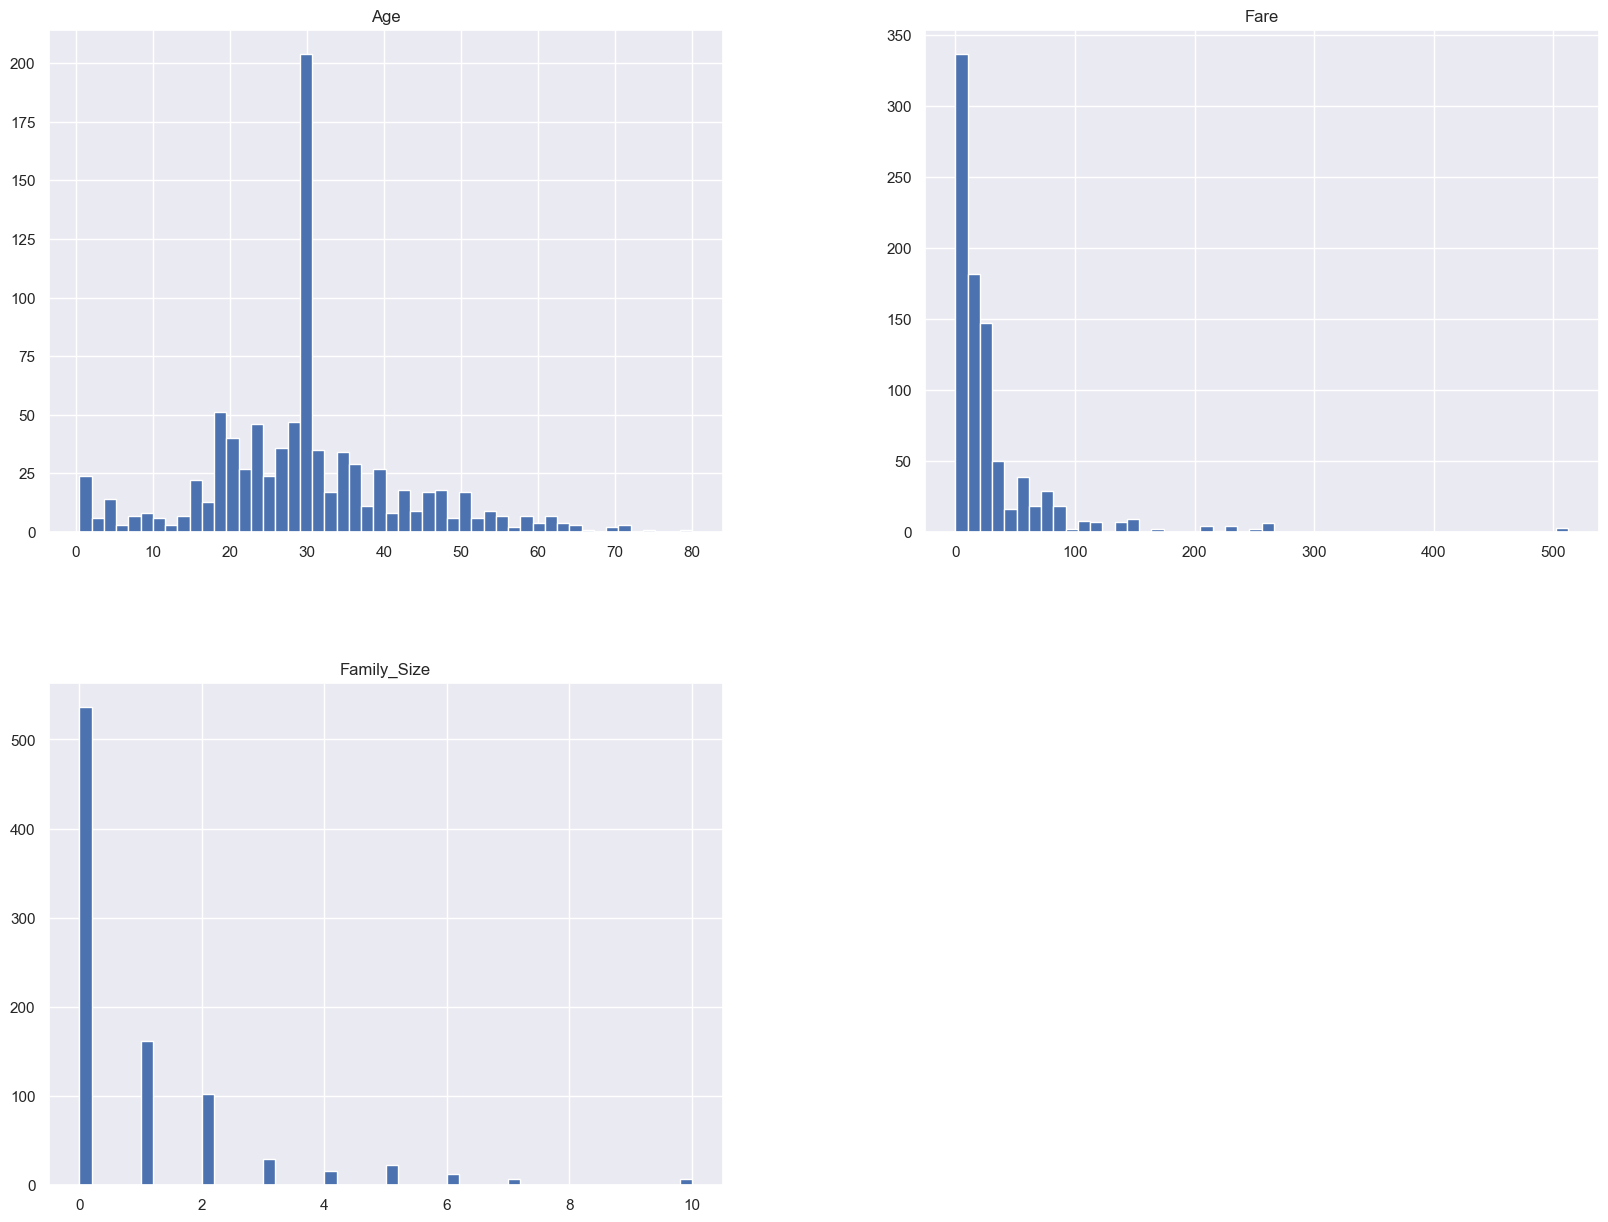

In [51]:
# Histograms for the variables Age, Fare, Family_Size, Age_Class of the training dataset. Scale to the full width of the window.

df_train_stats[['Age', 'Fare', 'Family_Size']].hist(figsize=(20, 15), bins=50)

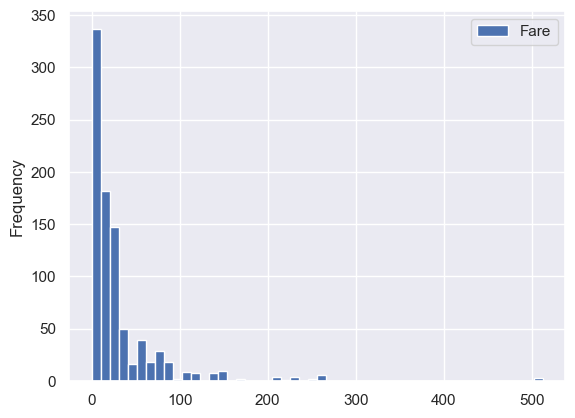

In [52]:
df_train.Fare.plot(kind='hist', bins=50, legend=True)
plt.grid(True)

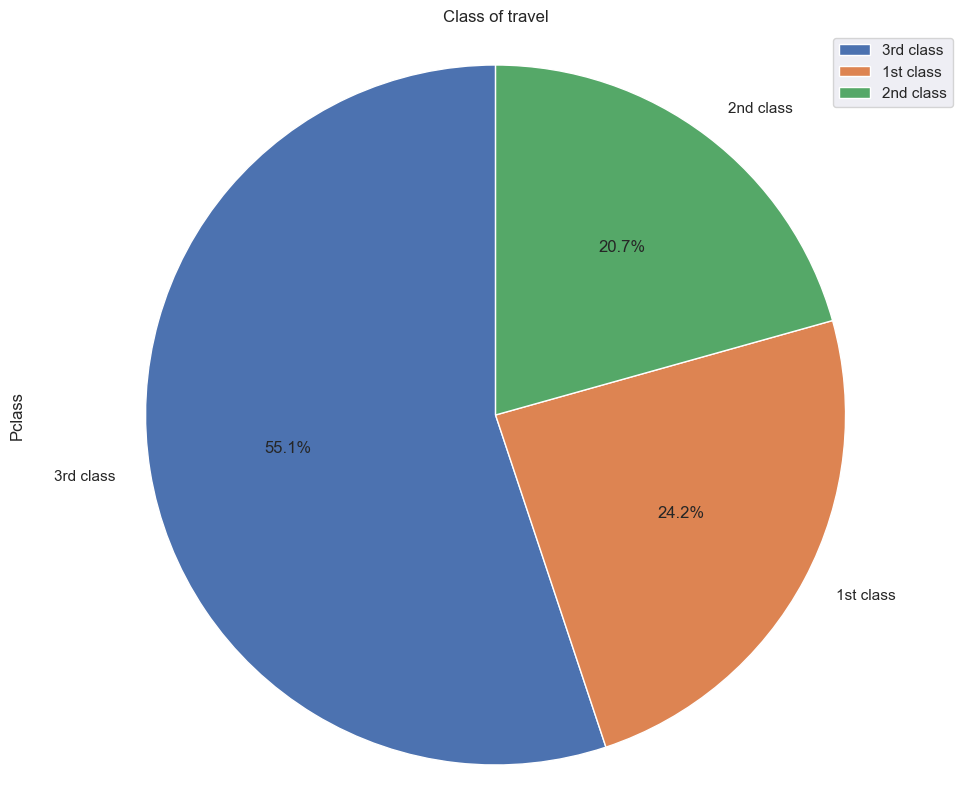

In [53]:
# Cake chart for the variable Pclass of the training dataset. Scale to the full width of the window. Include the legend that shows the class of travel (1st class equal 1, 2nd class equal 2, 3rd class equal 3). Save the chart as a figure in the outcome folder within the project folder.

df_train.Pclass.value_counts().plot(kind='pie', figsize=(12, 10), autopct='%1.1f%%', startangle=90, shadow=False, legend=True, labels=['3rd class', '1st class', '2nd class'])
plt.axis('equal')
plt.title('Class of travel')
plt.savefig(Path(cwd.parent, 'output', 'class_of_travel_train.png'))

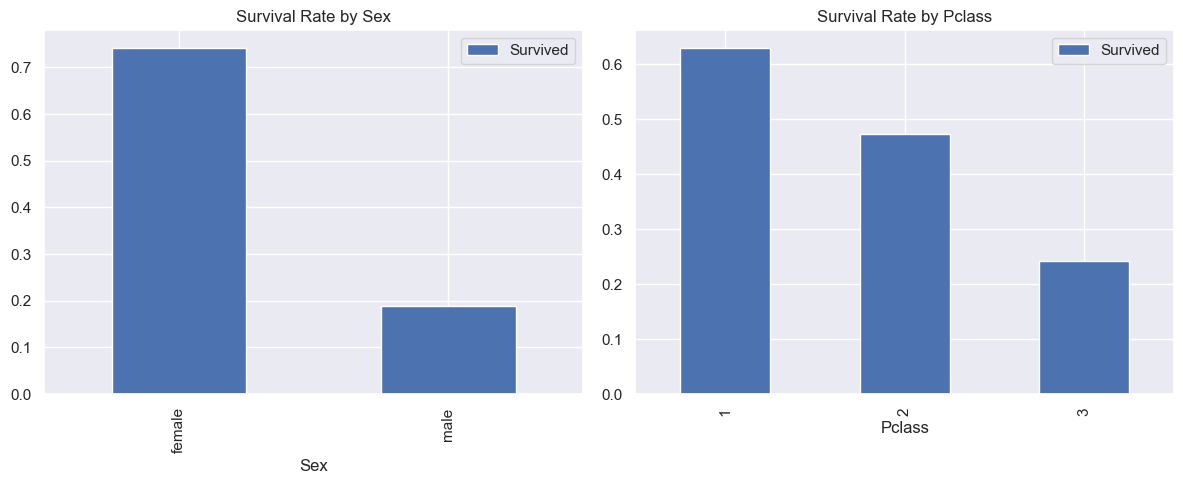

In [54]:
# Group by Sex and Pclass and calculate the mean of the variable 'Survived' for training dataset. Save the chart as a figure in the outcome folder within the project folder.

# Create subplots with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Group by 'Sex' and plot on the first subplot
df_train.groupby('Sex')[['Survived']].mean().plot(kind='bar', ax=ax1)
ax1.set_title('Survival Rate by Sex')

# Group by 'Pclass' and plot on the second subplot
df_train.groupby('Pclass')[['Survived']].mean().plot(kind='bar', ax=ax2)
ax2.set_title('Survival Rate by Pclass')

# Display the plots
plt.tight_layout()
plt.show()



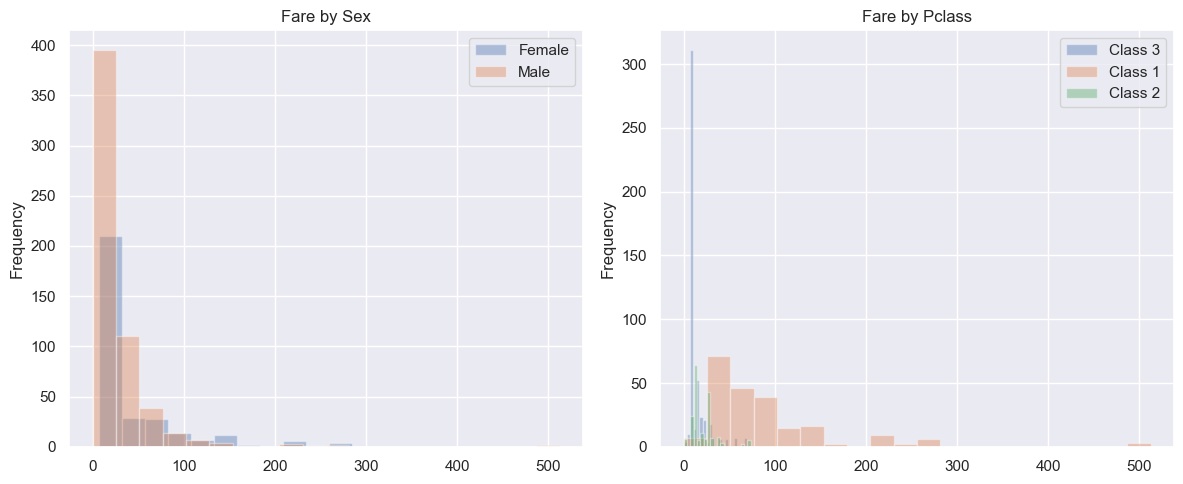

In [55]:
# Group by Sex and Pclass and and show the distribution of the variable 'Fare' for training dataset. Save the chart as a figure in the outcome folder within the project folder.

# Create subplots with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Group by Sex and plot on the first subplot.
df_train[df_train['Sex'] == 'female']['Fare'].plot(kind='hist', bins=20, alpha=0.4, label='Female', legend=True, ax=ax1)
df_train[df_train['Sex'] == 'male']['Fare'].plot(kind='hist', bins=20, alpha=0.4, label='Male', legend=True, ax=ax1)
ax1.set_title('Fare by Sex')
ax1.legend()

# Group by Pclass and plot on the second subplot
for pclass in df_train['Pclass'].unique():
    df_train[df_train['Pclass'] == pclass]['Fare'].plot(kind='hist', bins=20, alpha=0.4, label=f'Class {pclass}', legend=True, ax=ax2)
ax2.set_title('Fare by Pclass')
ax2.legend()

# Display the plots
plt.tight_layout()
plt.show()


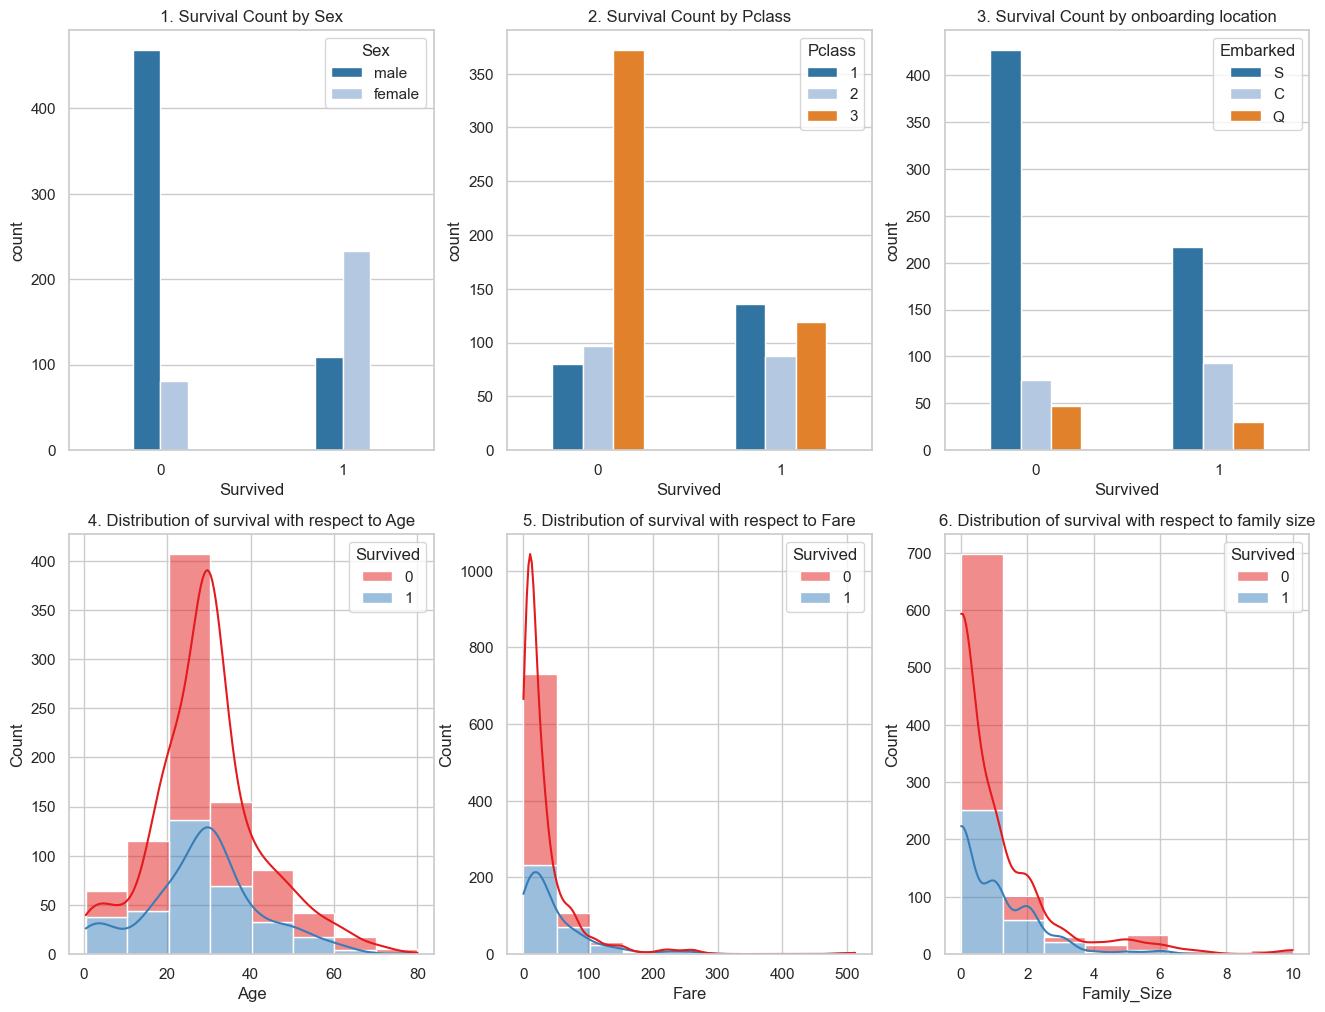

In [56]:
sns.set(style="whitegrid")
plt.figure(figsize=(16,12))

# sex vs survival rate:
plt.subplot(2,3,1)
sns.countplot(df_train,x='Survived',hue='Sex',palette='tab20',width=0.3)
plt.title('1. Survival Count by Sex')

# Passenger class vs survival rate:
plt.subplot(2,3,2)
sns.countplot(x="Survived", hue="Pclass", data=df_train, palette="tab20",width=0.5)
plt.title('2. Survival Count by Pclass')

# Embarking location vs survival rate:
plt.subplot(2,3,3)
sns.countplot(x="Survived", hue="Embarked", data=df_train, palette="tab20",width=0.5)
plt.title('3. Survival Count by onboarding location')

# Age vs survival rate:
plt.subplot(2,3,4)
sns.histplot(data=df_train,x='Age',hue='Survived',bins=8,multiple='stack',kde=True, palette='Set1')
plt.title('4. Distribution of survival with respect to Age')

# Fare vs survival rate:
plt.subplot(2,3,5)
sns.histplot(data=df_train, x="Fare", hue="Survived", bins=10,multiple='stack',kde=True,palette='Set1')
plt.title('5. Distribution of survival with respect to Fare')

# Ticket Fare vs survival rate:
plt.subplot(2,3,6)
sns.histplot(df_train, x='Family_Size', hue='Survived',bins=8,multiple='stack',kde=True,palette='Set1')
plt.title('6. Distribution of survival with respect to family size')

plt.show()

# Model building

### Logistic regression
The dependent variable (target) is a binary variable: survived or not survived. Logistic regression is a suitable model among those belonging to classification to predict the likehood of survival.

In [57]:
# Import packages for scaling the data, building the model, and evaluating the model

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split # to split the data into train and test datasets: not necessary in this case as Kaggle provides the test dataset to test the model.

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.metrics import roc_curve, roc_auc_score

In [58]:
# In this case, I do not need to split the training dataset into train and test datasets because Kaggle provides the test dataset to test the model.

# Here below in comment, there is a code from Kaggle to use as an example. I will follow this approach and model first a logistic regression and then a random forest. I will then compare the two models.

# from sklearn.ensemble import RandomForestClassifier
#
# y = train_data["Survived"]
#
# features = ["Pclass", "Sex", "SibSp", "Parch"]
# X = pd.get_dummies(train_data[features])
# X_test = pd.get_dummies(test_data[features])
#
# model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
# model.fit(X, y)
# predictions = model.predict(X_test)
#
# output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
# output.to_csv('submission.csv', index=False)


In [59]:
# Define the target variable
y = df_train['Survived']


#### Model 1: Using just one feature: 'Fare'

In [60]:
# Define the features
features_1 = ['Fare']

In [61]:
# Scalling the data
# I will use the StandardScaler function from the package sklearn.preprocessing to scale the data. I will scale the data for the training dataset and the test dataset.

# As I am bulding multiple models with different features, I will scale the data for each model. This will ensure higher comparability across the models.

scaler = StandardScaler()
X_1 = scaler.fit_transform(df_train[features_1])
X_1_test = scaler.transform(df_test[features_1])

In [62]:
# Find NaNs in the scaled data
np.isnan(X_1).sum()

np.isnan(X_1_test).sum()

0

In [ ]:
# Model the logistic regression function using the package sklearn.linear_model

model_1 = LogisticRegression()
model_1.fit(X_1, y)
predictions_1 = model_1.predict(X_1_test)


In [73]:
# Get the coefficients (coefficients of the logit model)
coeff_1 = model_1.coef_

# Get the intercept (constant term)
k_1 = model_1.intercept_

# Print the coefficients and intercept
print("Coefficients:", coeff_1)
print("Intercept:", k_1)

Coefficients: [[0.74565018]]
Intercept: [-0.45268417]


In [66]:
# Evaluate the model with the evaluation metrics: accuracy score, confusion matrix, and classification report

print(f'Accuracy score: {accuracy_score(y, model_1.predict(X_1)):.2f}')
print(f'Confusion matrix:\n {confusion_matrix(y, model_1.predict(X_1))}')
print(f'Classification report:\n {classification_report(y, model_1.predict(X_1))}')


Accuracy score: 0.67
Confusion matrix:
 [[512  37]
 [260  82]]
Classification report:
               precision    recall  f1-score   support

           0       0.66      0.93      0.78       549
           1       0.69      0.24      0.36       342

    accuracy                           0.67       891
   macro avg       0.68      0.59      0.57       891
weighted avg       0.67      0.67      0.61       891



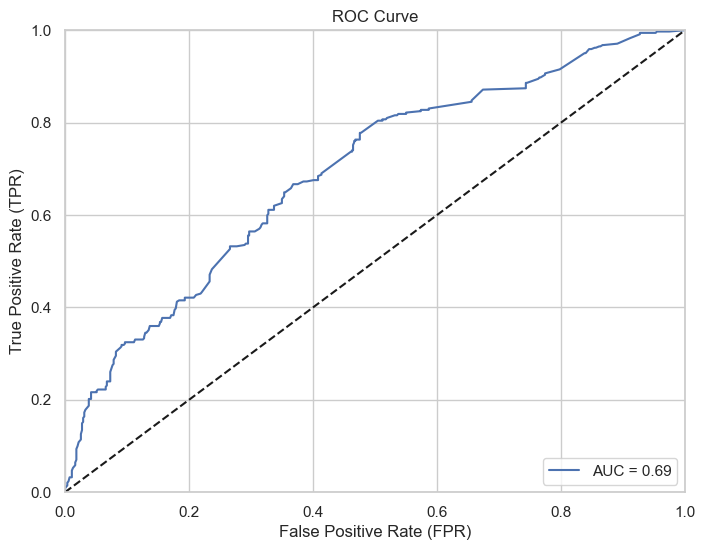

In [70]:
# Model evaulation: Visual representation
# Evaluate the outcome with the the ROC (Receiver Operating Characteristic) curve and the AUC (Area Under the Curve) score. By visualizing the ROC curve and AUC score, you can assess the model's ability to discriminate between the positive and negative classes. A higher AUC score typically indicates better performance.

# Compute predicted probabilities for the positive class (in this case , those who survived)
predicted_probabilities = model_1.predict_proba(X_1)[:, 1]

# Compute the ROC curve using the roc_curve() from scikit-learn, which takes the true labels and the predicted probabilities.
fpr, tpr, thresholds = roc_curve(y, predicted_probabilities)

# Compute the AUC score
auc_score = roc_auc_score(y, predicted_probabilities)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal reference line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [74]:
# Comparing the model based on the sklearn.linear_model with the model based on the statsmodels.api

import statsmodels.api as sm
from statsmodels.formula.api import logit

# Add a constant term to the independent variable matrix
X_1_k = sm.add_constant(X_1)

# Create and fit a logistic regression model
model_1_k = sm.Logit(y, X_1_k)

# Fit the model
result_k = model_1_k.fit()

# Get the summary of the logistic regression model
print(result_k.summary())

# Make predictions for X_1_test (don't forget to add a constant term)
X_1_k_test = sm.add_constant(X_1_test)
predictions_1_k = result_k.predict(X_1_k_test)


Optimization terminated successfully.
         Current function value: 0.627143
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      889
Method:                           MLE   Df Model:                            1
Date:                Mon, 11 Sep 2023   Pseudo R-squ.:                 0.05822
Time:                        17:48:39   Log-Likelihood:                -558.78
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 9.427e-17
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4519      0.072     -6.257      0.000      -0.593      -0.310
x1             0.7548      0.

In [ ]:
# Use the results from the statsmodels to run post-hoc analysis, calculate the marginal effects and to produce coefficient tables and graphs.

#### Model 2: Using two features: 'Fare' and 'Age'

In [ ]:
# Define the features
# features_2 = ['Fare', 'Age']

In [ ]:
# Scalling the data
# X_2 = scaler.fit_transform(df_train[features_2])
# X_2_test = scaler.transform(df_test[features_2])

In [ ]:
# Model the logistic regression function using the package sklearn.linear_model
#
# model_2 = LogisticRegression()
# model_2.fit


In [ ]:
# Model evaulation: Visual representation
# Evaluate the outcome with the the ROC (Receiver Operating Characteristic) curve and the AUC (Area Under the Curve) score. By visualizing the ROC curve and AUC score, you can assess the model's ability to discriminate between the positive and negative classes. A higher AUC score typically indicates better performance.

# Compute predicted probabilities for the positive class (in this case , those who survived
# predicted_probabilities = model_2.predict_proba(X_2)[:, 1]

# Compute the ROC curve using the roc_curve() from scikit-learn, which takes the true labels and the predicted probabilities.


# Compute the AUC score

# Plot the ROC curve


In [ ]:
# Model 3: Using three features:
# features_3 = ['Fare', 'Age', 'Family_Size']

In [ ]:
# Model 4: Using four features:
# features_4 = ['Fare', 'Age', 'Family_Size', 'Gender_female']

In [ ]:
# Model 5: Using multiple features, including travel class and embarking ports:
# - I include only Class_ 1 and Class_3 and only two ports of embarkation (Cherbourg and Southampton) to avoid multicollinearity
# - I do not include the variable 'social status' as it is already captured by the travel class: the higher the class, the higher the social status.

# feature_5 = ['Fare', 'Age', 'Family_Size', 'Gender_female', 'Class_1', 'Class_3', 'Port_C', 'Port_S']



In [ ]:
## TODO: Discuss with Nadine the three approaches related to Bayes classifier: linear discriminant analysis, quadratic discriminant analysis, and naive Bayes classifier.
## TODO: Should I scale the data while using logistic regression and LDA and QDA? and what if I want to use a random forest and compare the results with the logistic regression?

### Linear discriminant analysis (LDA)